In [2]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine-date')

In [4]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [7]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data,target,test_size= 0.2, random_state=42)

In [10]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [13]:
print(lr.coef_,lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


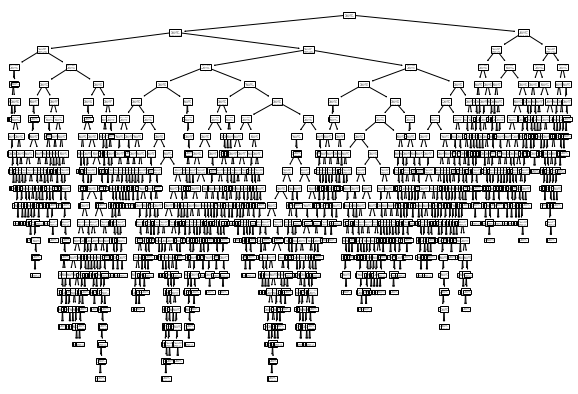

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

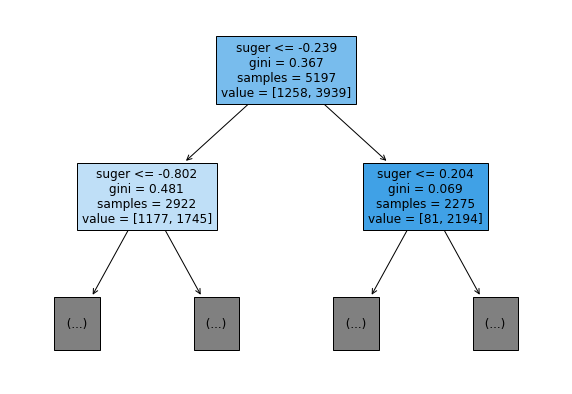

In [17]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,filled =True, feature_names=['alcohol','suger','pH'])
plt.show()

In [20]:
dt = DecisionTreeClassifier(max_depth=3,random_state= 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


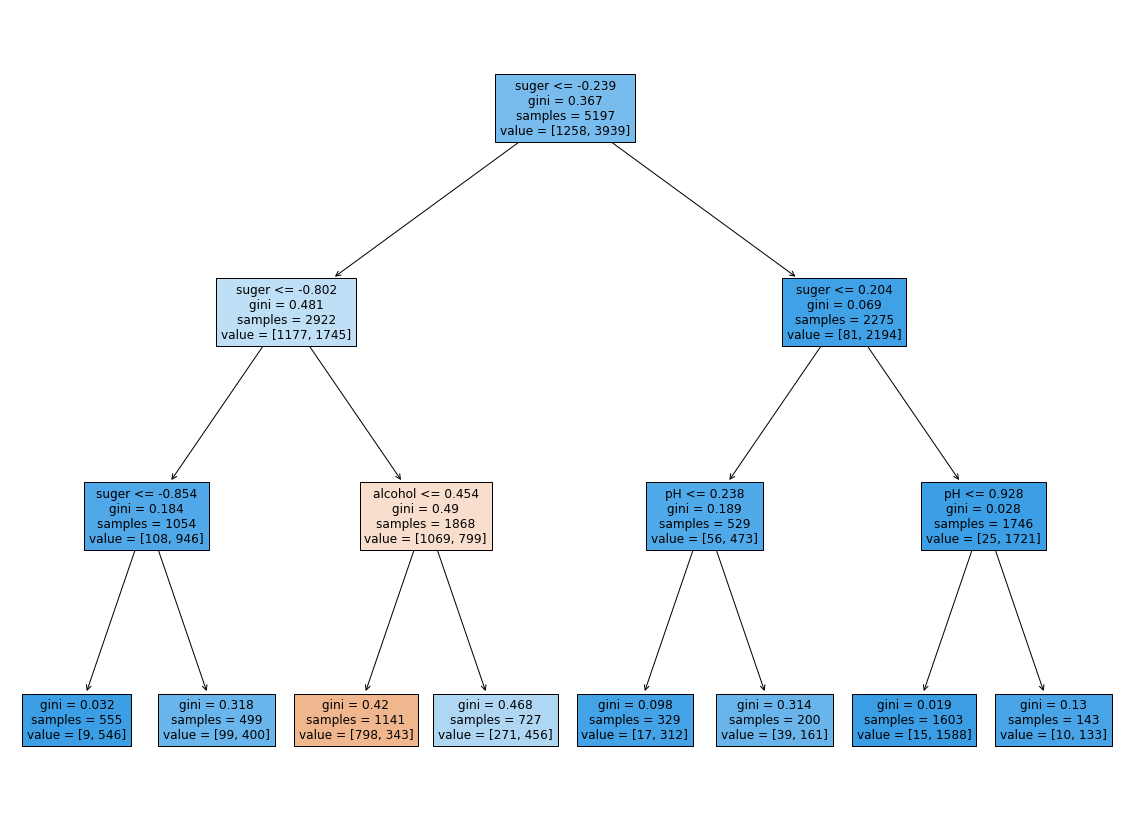

In [21]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True, feature_names = ['alcohol','suger','pH'])
plt.show()

In [23]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_input,train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.8454877814123533
0.8415384615384616


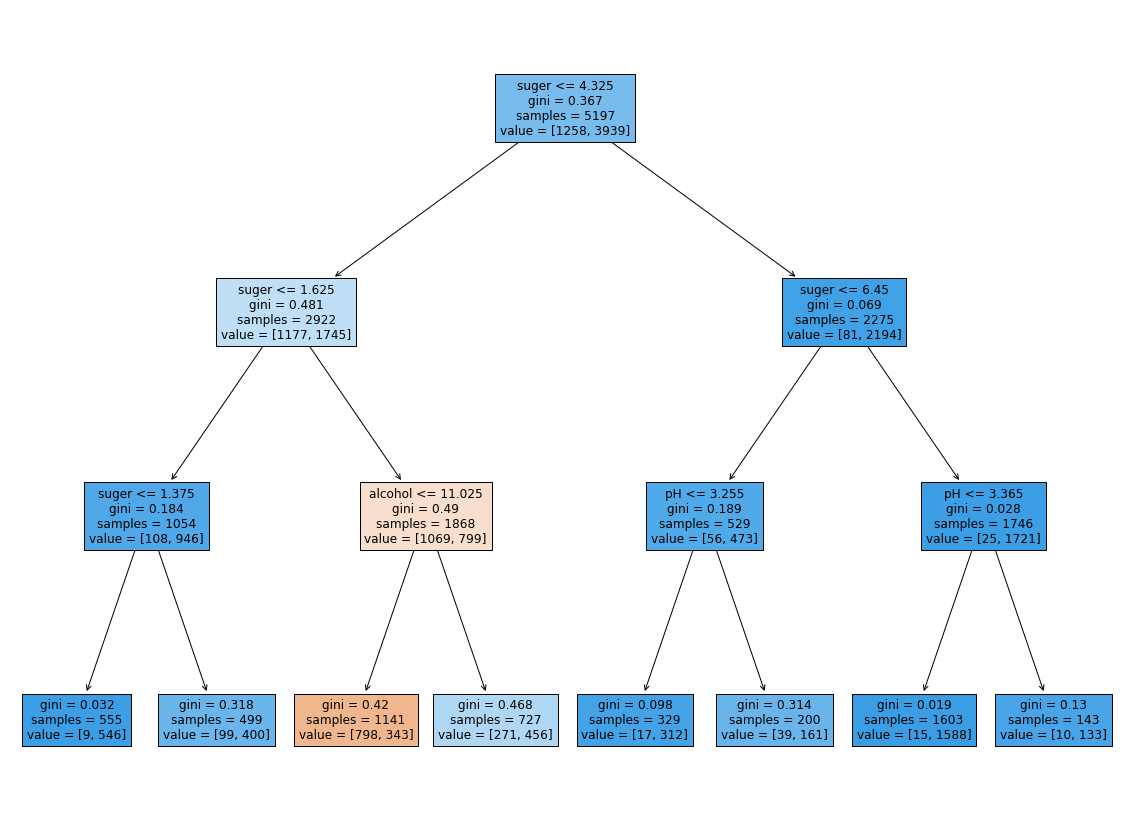

In [24]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True, feature_names = ['alcohol','suger','pH'])
plt.show()

In [25]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


In [26]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00398493, 0.00295758, 0.00302219, 0.00398922, 0.00302887]), 'score_time': array([0.        , 0.00099564, 0.0009985 , 0.        , 0.0009923 ]), 'test_score': array([0.84230769, 0.83365385, 0.84504331, 0.8373436 , 0.8479307 ])}


In [27]:
import numpy as np
print(np.mean(scores['test_score']))

0.8412558303102096


In [28]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())
print(np.mean(scores['test_score']))

0.8412558303102096


In [29]:
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8335549132947977


In [30]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease' : [0.0001,0.0002,0.0003,0.0004,0.0005]}
gs = GridSearchCV(DecisionTreeClassifier(random_state = 42), params,n_jobs=-1)

In [31]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [32]:
dt = gs.best_estimator_
print(dt.score(train_input,train_target))

0.9615162593804117


In [35]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [36]:
gs.best_estimator_

DecisionTreeClassifier(min_impurity_decrease=0.0001, random_state=42)

In [37]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [43]:
params = {'min_impurity_decrease' : np.arange(0.0001,0.001,0.0001), 
          'max_depth' : range(5,20,1), 
          'min_samples_split' : range(2,100,10)}

In [44]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs = -1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [45]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [46]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


In [47]:
from scipy.stats import uniform, randint

In [49]:
rgen = randint(0,10)
rgen.rvs(10)

array([5, 2, 8, 9, 9, 8, 1, 4, 9, 8])

In [50]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 92, 106,  95,  91, 104, 101,  89, 109, 110, 103], dtype=int64))

In [52]:
ugen = uniform(0,1)
ugen.rvs(10)

array([0.94344492, 0.56658911, 0.01006997, 0.0117471 , 0.07101973,
       0.55267745, 0.52587048, 0.0609815 , 0.60887877, 0.89128233])

In [54]:
params = {'min_impurity_decrease':uniform(0.0001,0.001),
          'max_depth':randint(20,50),
          'min_samples_split' : randint(2,25),
          'min_samples_leaf' : randint(1,25)}

In [55]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter = 100, n_jobs=-1,random_state=42)
gs.fit(train_input,train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D398FDE4F0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D39999AF40>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D398FDE5B0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D3999B8B80>},
                   random_state=42)

In [56]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [58]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [59]:
dt = gs.best_estimator_
print(dt.score(test_input,test_target))

0.86
